# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Predicting Used Car Prices

The used car dealership has hundreds of cars in its inventory. The used cars need to be priced appropriately so that the cars sell quickly and the dealer gets the most value out of selling them. There are many factors that go into pricing the cars appropriately. Based on historical used car sales, we can develop a model to determine the factors that are most important in pricing a used car and use this model to price the car optimally. 

This can be done by using a supervised learning technique called regression. This technique is suitable for modeling a numerical variable such as the price is this case. The regression model learns from historical data and determines what factors are most important in determining the price of a car. The model also learns how much each of those factors contribute to the price of the car. Once learned, the model is then used to predict the price of a car given a set of key factors about the car.

We will be using a historical data set of used cars to create a regression model that can be used for predicting the price of a used car.

In [381]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import warnings
import plotly.io as pio
pio.renderers.default = "svg"

In [327]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display="diagram")

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The first step is to understand the data by exploring and visualizing it in various ways:
- Describe the data, its size, fields and the types of fields
- Check distinct values and distribution of categorical fields
- Check distribution of numerical features including the target feature.
- Check for duplicates
- Check for missing/null values or zero values in fields
- Plot charts of fields to help understand the patterns in the data
- Look for relationships between fields and with the target field
- Look for outliers in the data

In [328]:
# Read in the dataset
vehicle = pd.read_csv('data/vehicles.csv')

In [329]:
# Check the size and shape
vehicle.size

7683840

In [330]:
vehicle.shape

(426880, 18)

In [331]:
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [332]:
# Check the field names, types and non-null counts
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [333]:
# Convert fields with object data type to the appropriate data type
vehicle = vehicle.convert_dtypes()
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [334]:
# Check the first few rows
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,az
1,7218891961,fayetteville,11900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ar
2,7221797935,florida keys,21000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,fl
3,7222270760,worcester / central MA,1500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ma
4,7210384030,greensboro,4900,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,nc


In [335]:
# Check the last few rows
vehicle.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,1N4AA6AV6KC367801,fwd,<NA>,sedan,<NA>,wy
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,<NA>,gas,12029,clean,other,7JR102FKXLG042696,fwd,<NA>,sedan,red,wy
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,<NA>,diesel,4174,clean,other,1GYFZFR46LF088296,<NA>,<NA>,hatchback,white,wy
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,58ABK1GG4JU103853,fwd,<NA>,sedan,silver,wy
426879,7301591129,wyoming,30590,2019,bmw,4 series 430i gran coupe,good,<NA>,gas,22716,clean,other,WBA4J1C58KBM14708,rwd,<NA>,coupe,<NA>,wy


In [336]:
# Data may be sorted by region or state, so need to be shuffled before splitting into training and test sets

In [337]:
# Check for nulls
vehicle.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [338]:
vehicle.describe()

,id,price,year,odometer
count,426880.0,426880.0,425675.0,422480.0
mean,7311486634.224333,75199.033187,2011.235191,98043.331443
std,4473170.412559,12182282.173598,9.45212,213881.500798
min,7207408119.0,0.0,1900.0,0.0
25%,7308143339.25,5900.0,2008.0,37704.0
50%,7312620821.0,13950.0,2013.0,85548.0
75%,7315253543.5,26485.75,2017.0,133542.5
max,7317101084.0,3736928711.0,2022.0,10000000.0


In [339]:
vehicle.describe(include = ['string'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [360]:
# Check unique values in categorical fields
vehicle['model'].value_counts(dropna=False)

model
f-150                        8009
<NA>                         5277
silverado 1500               5140
1500                         4211
camry                        3135
                             ... 
cr-v lx automatic               1
tacoma double cab trd 4x4       1
avenger r/t 4dr sedan           1
yukon xl slt suv                1
Paige Glenbrook Touring         1
Name: count, Length: 29650, dtype: Int64

In [359]:
vehicle['manufacturer'].value_counts(dropna=False)

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
<NA>               17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun      

In [358]:
vehicle['size'].value_counts(dropna=False)

size
<NA>           306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: count, dtype: Int64

<Axes: xlabel='size', ylabel='Count'>

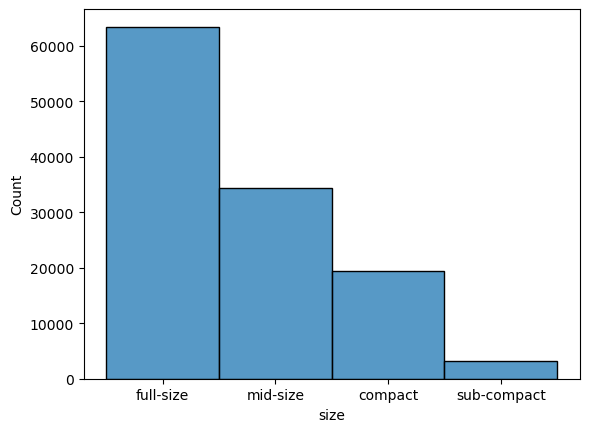

In [343]:
#plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='size')

In [357]:
vehicle['type'].value_counts(dropna=False)

type
<NA>           92858
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: Int64

<Axes: xlabel='type', ylabel='Count'>

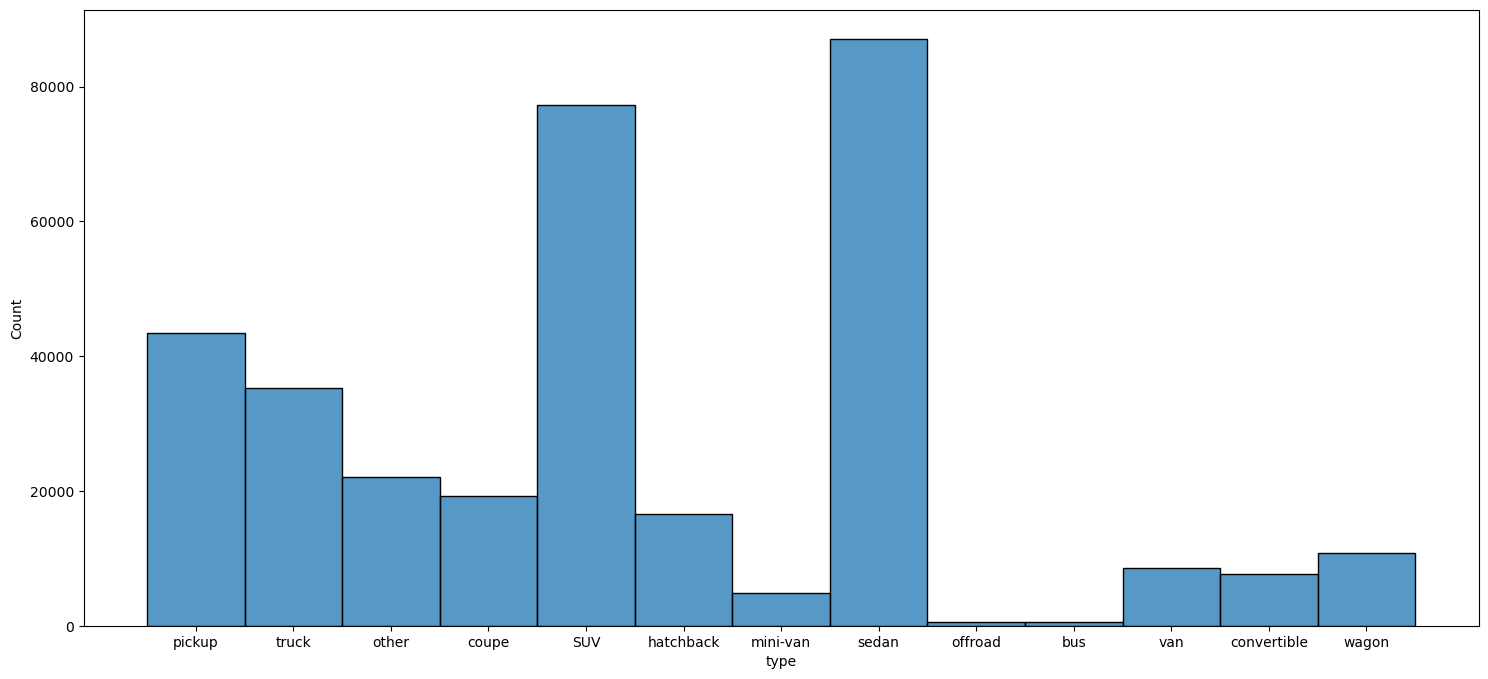

In [345]:
plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='type')

In [356]:
vehicle['paint_color'].value_counts(dropna=False)

paint_color
<NA>      130203
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
yellow      2142
orange      1984
purple       687
Name: count, dtype: Int64

<Axes: xlabel='paint_color', ylabel='Count'>

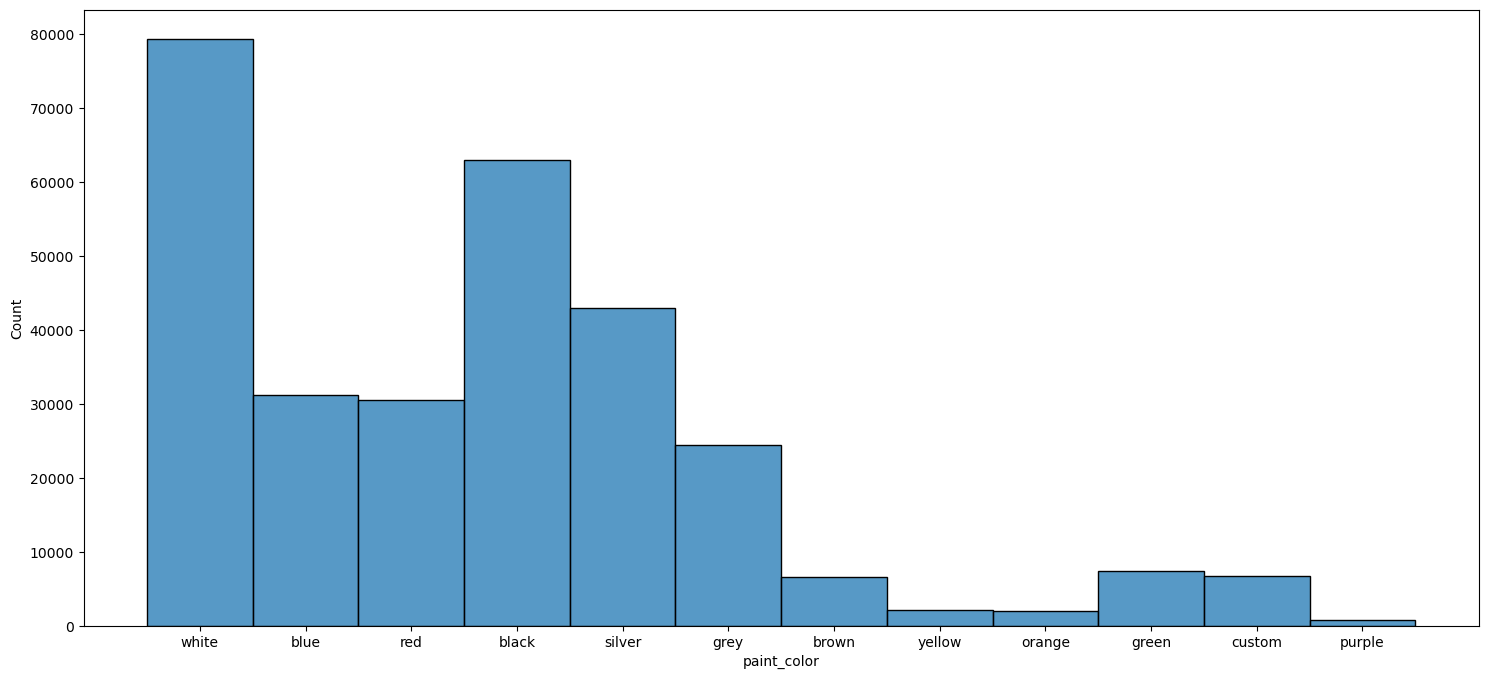

In [347]:
plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='paint_color')

In [355]:
vehicle['drive'].value_counts(dropna=False)

drive
4wd     131904
<NA>    130567
fwd     105517
rwd      58892
Name: count, dtype: Int64

<Axes: xlabel='drive', ylabel='Count'>

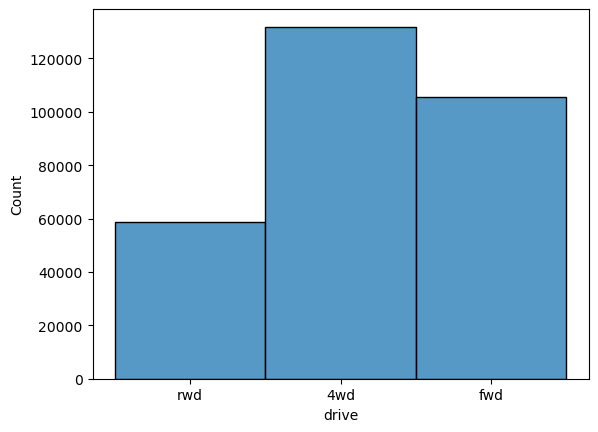

In [349]:
#plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='drive')

In [361]:
vehicle['transmission'].value_counts(dropna=False)

transmission
automatic    336524
other         62682
manual        25118
<NA>           2556
Name: count, dtype: Int64

<Axes: xlabel='transmission', ylabel='Count'>

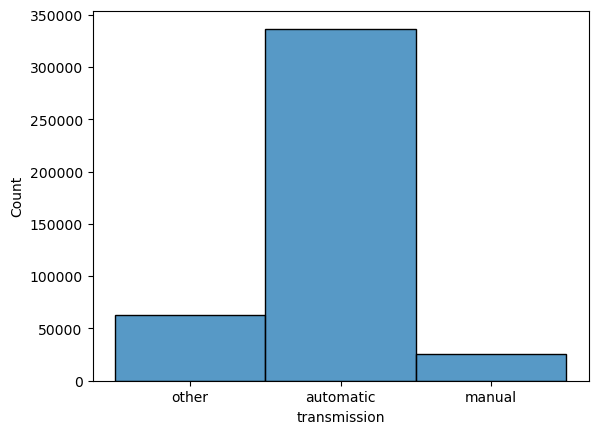

In [209]:
sns.histplot(vehicle, x='transmission')

In [362]:
vehicle['title_status'].value_counts(dropna=False)

title_status
clean         405117
<NA>            8242
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: Int64

<Axes: xlabel='title_status', ylabel='Count'>

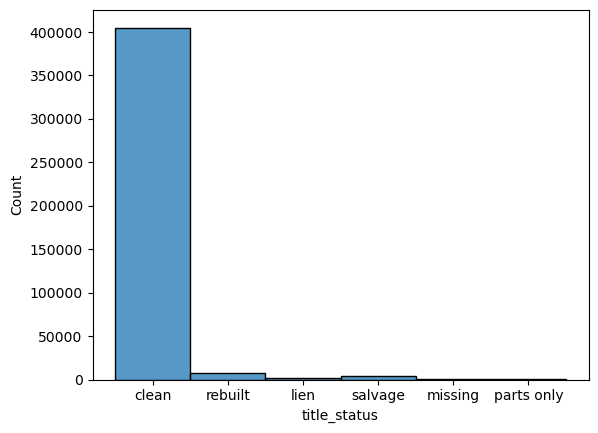

In [211]:
sns.histplot(vehicle, x='title_status')

In [363]:
vehicle['fuel'].value_counts(dropna=False)

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
<NA>          3013
electric      1698
Name: count, dtype: Int64

<Axes: xlabel='fuel', ylabel='Count'>

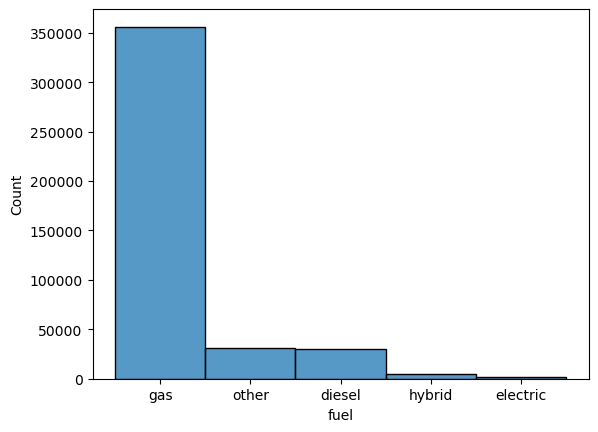

In [364]:
sns.histplot(vehicle, x='fuel')

In [365]:
vehicle['cylinders'].value_counts(dropna=False)

cylinders
<NA>            177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: count, dtype: Int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '8 cylinders'),
  Text(1, 0, '6 cylinders'),
  Text(2, 0, '4 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, 'other'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, '10 cylinders'),
  Text(7, 0, '12 cylinders')])

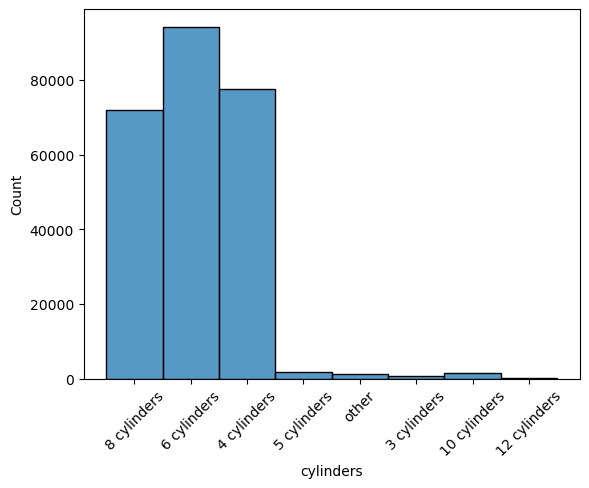

In [213]:
sns.histplot(vehicle, x='cylinders')
plt.xticks(rotation=45)

In [366]:
vehicle['condition'].value_counts(dropna=False)

condition
<NA>         174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: Int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'good'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'fair'),
  Text(3, 0, 'like new'),
  Text(4, 0, 'new'),
  Text(5, 0, 'salvage')])

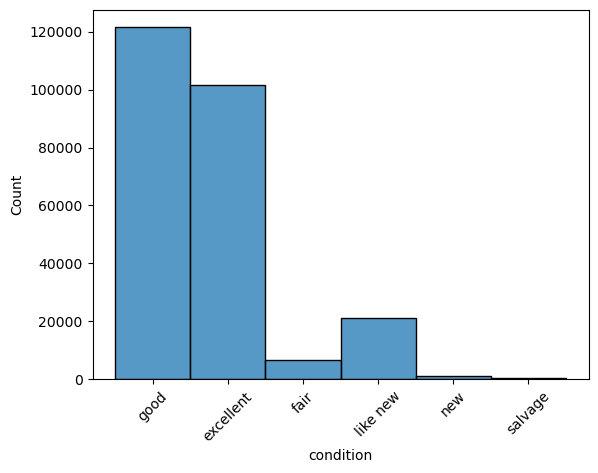

In [367]:
sns.histplot(vehicle, x='condition')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'lexus'),
  Text(12, 0, 'jaguar'),
  Text(13, 0, 'buick'),
  Text(14, 0, 'chrysler'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'lincoln'),
  Text(19, 0, 'alfa-romeo'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'acura'),
  Text(22, 0, 'hyundai'),
  Text(23, 0, 'mercedes-benz'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'porsche'),
  Text(28, 0, 'kia'),
  Text(29, 0, 'rover'),
  Text(30, 0

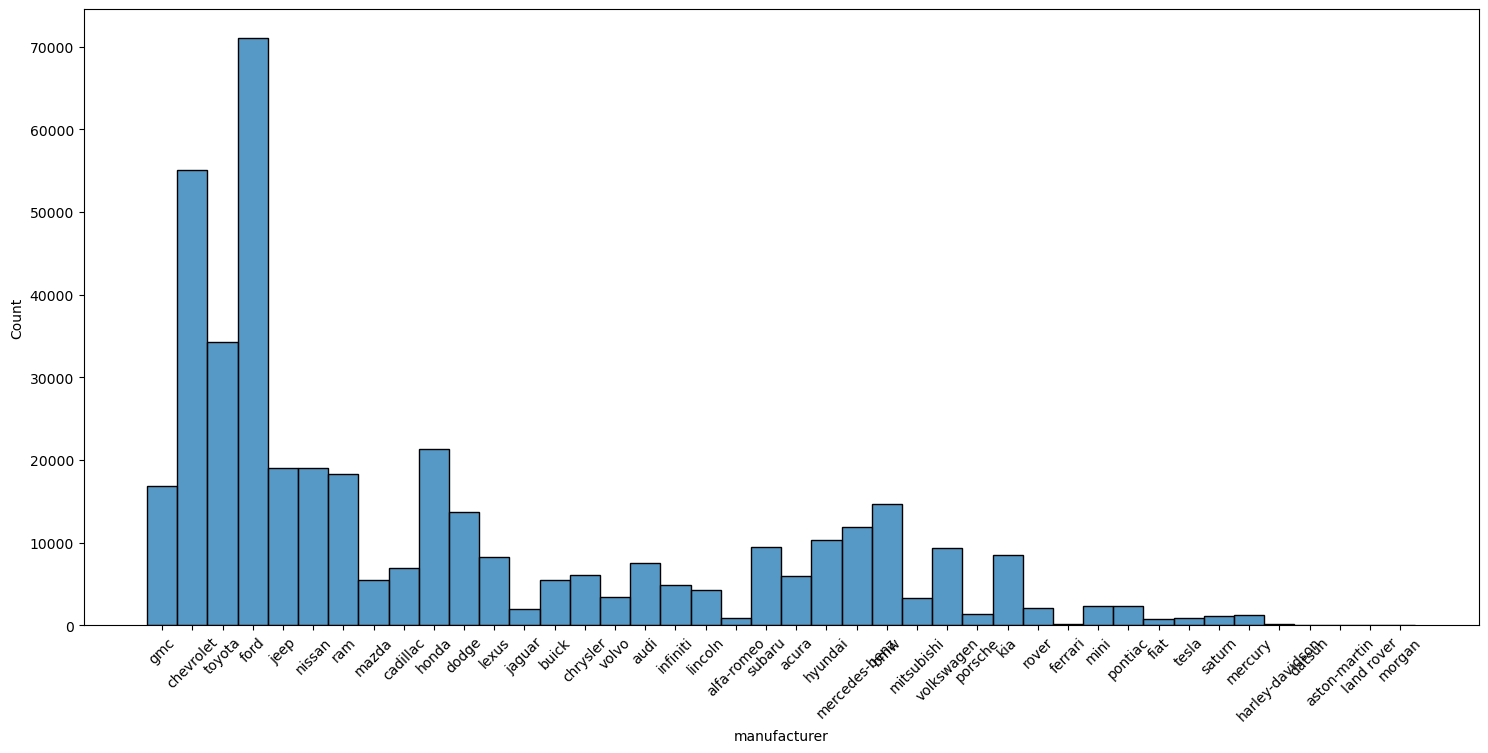

In [368]:
plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='manufacturer')
plt.xticks(rotation=45)

In [369]:
vehicle.model.nunique()

29649

<Axes: xlabel='odometer'>

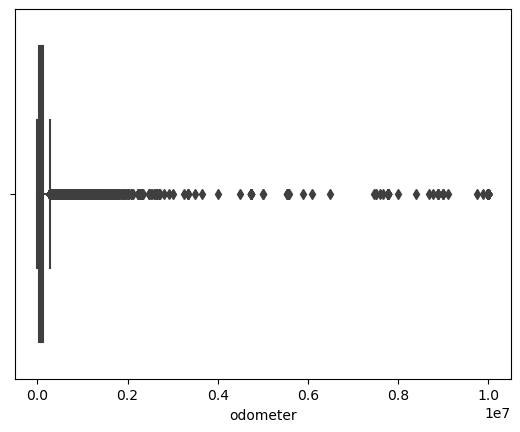

In [370]:
# Check odometer field
sns.boxplot(vehicle, x="odometer")

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

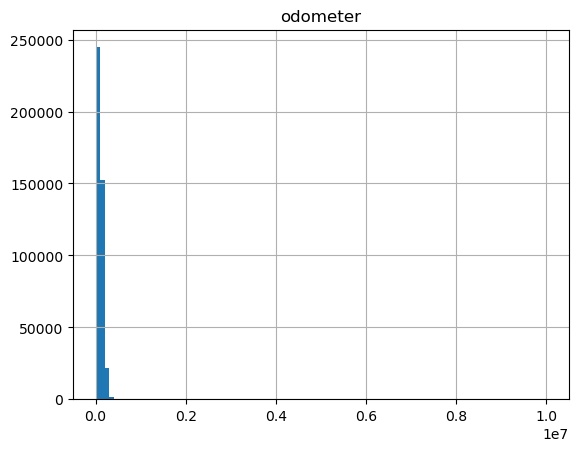

In [218]:
vehicle.hist(column='odometer', bins=100)

In [371]:
# Check odometer value zero
vehicle[vehicle['odometer'] == 0].count()

id              1965
region          1965
price           1965
year            1943
manufacturer    1660
model           1851
condition        760
cylinders        823
fuel            1923
odometer        1965
title_status    1714
transmission    1962
VIN             1401
drive            927
size             199
type            1640
paint_color     1252
state           1965
dtype: int64

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

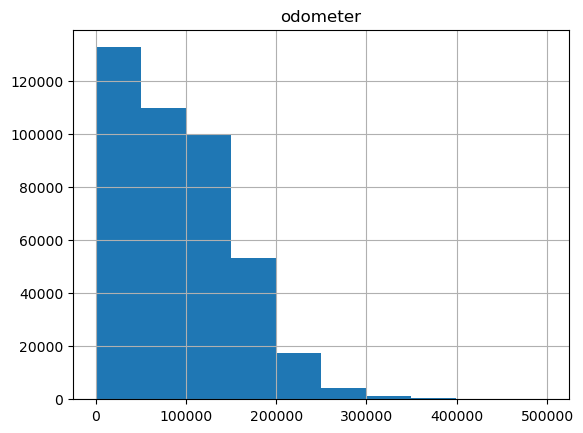

In [372]:
vehicle[(vehicle['odometer'] > 0) & (vehicle['odometer'] < 500000)].hist(column='odometer')

<Axes: xlabel='price'>

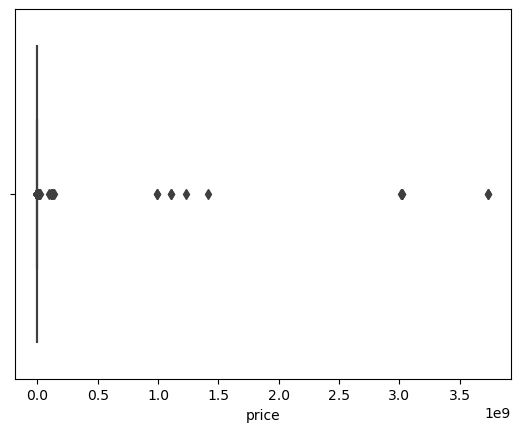

In [373]:
# Check price field
sns.boxplot(vehicle, x="price")

array([[<Axes: title={'center': 'price'}>]], dtype=object)

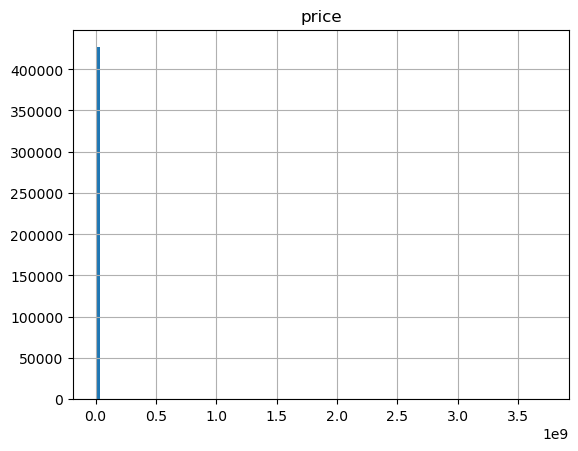

In [374]:
vehicle.hist(column='price', bins=100)

In [375]:
# Check rows where price = 0
vehicle[vehicle['price'] == 0].count()

id              32895
region          32895
price           32895
year            32863
manufacturer    31434
model           32319
condition       10180
cylinders       15627
fuel            32476
odometer        30785
title_status    32387
transmission    32162
VIN             24011
drive           22582
size             9467
type            25969
paint_color     19841
state           32895
dtype: int64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

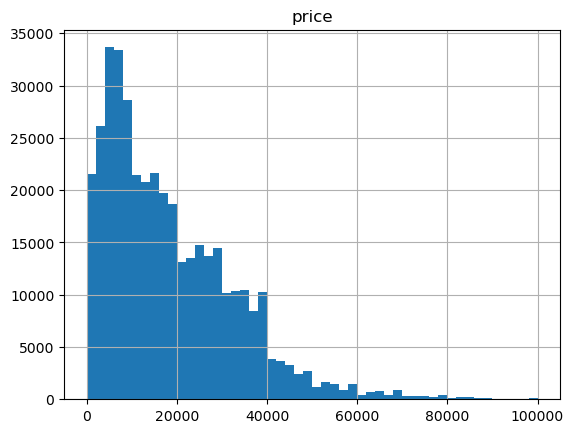

In [376]:
vehicle[(vehicle['price'] > 0) & (vehicle['price'] < 100000)].hist(column='price', bins=50)

In [377]:
# Price field contains zeros as well as outliers. These rows should be discarded.
# The distribution of price skews to the right. Use the logarithm of price in model.

<Axes: xlabel='state', ylabel='Count'>

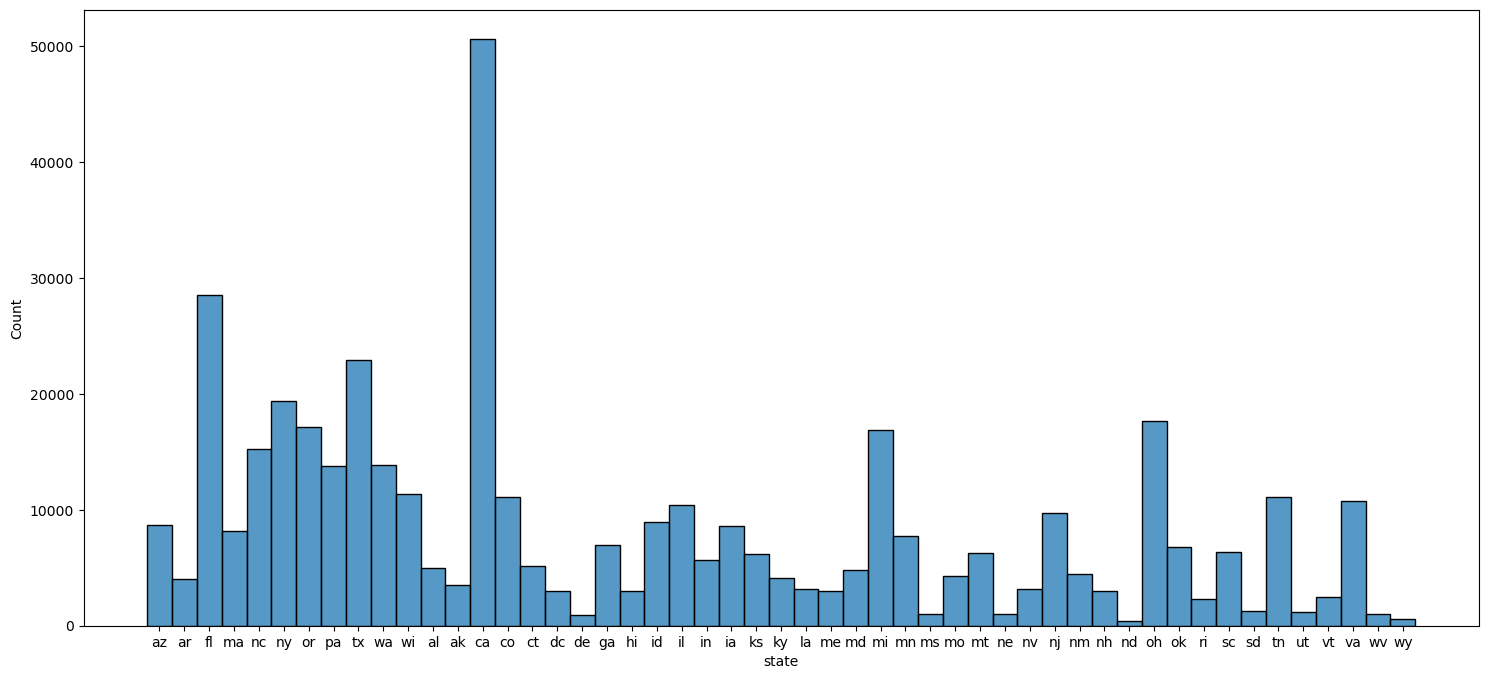

In [378]:
# Histogram of state
plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='state')

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'red'),
  Text(3, 0, 'black'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'grey'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'yellow'),
  Text(8, 0, 'orange'),
  Text(9, 0, 'green'),
  Text(10, 0, 'custom'),
  Text(11, 0, 'purple')])

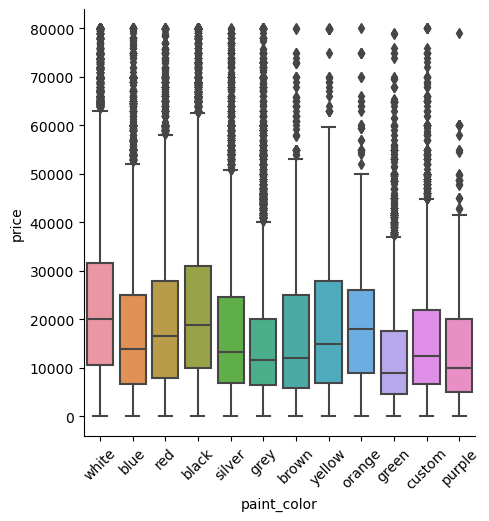

In [382]:
sns.catplot(data=vehicle[(vehicle['price'] > 0) & (vehicle['price'] < 80000)], x="paint_color", y="price", kind="box")
plt.xticks(rotation=45)

In [383]:
vehicle.year.nunique()

114

array([[<Axes: title={'center': 'year'}>]], dtype=object)

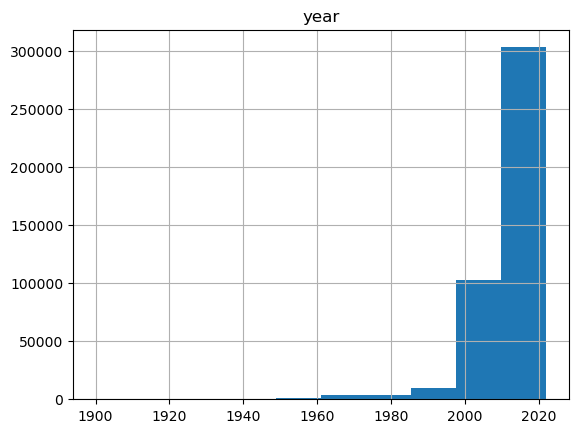

In [384]:
vehicle.hist('year')

In [385]:
vehicle[vehicle['year'] > 1990].groupby('year')['year'].count()

year
1991      608
1992      626
1993      712
1994      968
1995     1246
1996     1302
1997     1724
1998     1988
1999     3094
2000     3572
2001     4443
2002     5587
2003     7151
2004     8971
2005    10622
2006    12763
2007    14873
2008    17150
2009    12185
2010    15829
2011    20341
2012    23898
2013    30794
2014    30283
2015    31538
2016    30434
2017    36420
2018    36369
2019    25375
2020    19298
2021     2396
2022      133
Name: year, dtype: int64

In [386]:
# Data for years before 1995 can be removed

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'az'),
  Text(1, 0, 'ar'),
  Text(2, 0, 'fl'),
  Text(3, 0, 'ma'),
  Text(4, 0, 'nc'),
  Text(5, 0, 'ny'),
  Text(6, 0, 'or'),
  Text(7, 0, 'pa'),
  Text(8, 0, 'wa'),
  Text(9, 0, 'wi'),
  Text(10, 0, 'al'),
  Text(11, 0, 'ak'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'co'),
  Text(14, 0, 'ct'),
  Text(15, 0, 'dc'),
  Text(16, 0, 'de'),
  Text(17, 0, 'ga'),
  Text(18, 0, 'hi'),
  Text(19, 0, 'id'),
  Text(20, 0, 'il'),
  Text(21, 0, 'in'),
  Text(22, 0, 'ia'),
  Text(23, 0, 'ks'),
  Text(24, 0, 'ky'),
  Text(25, 0, 'la'),
  Text(26, 0, 'me'),
  Text(27, 0, 'md'),
  Text(28, 0, 'mi'),
  Text(29, 0, 'mn'),
  Text(30, 0, 'ms'),
  Text(31, 0, 'mo'),
  Text(32, 0, 'mt'),
  Text(33, 0, 'ne'),
  Text(34, 0, 'nv'),
  Text(35, 0, 'nj'),
  Text(36, 0, 'nm'),
  T

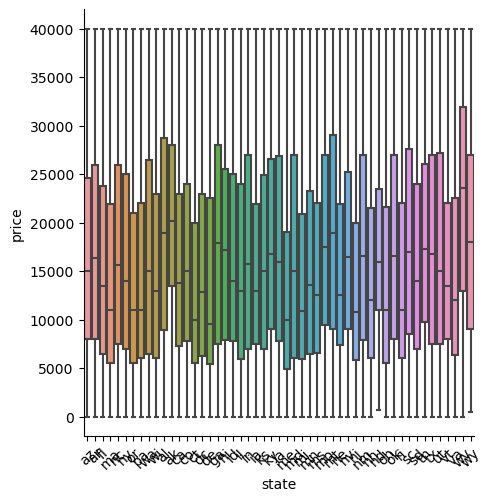

In [387]:
sns.catplot(data=vehicle[(vehicle['price'] > 0) & (vehicle['price'] < 40000)], x="state", y="price", kind="box")
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'lexus'),
  Text(12, 0, 'jaguar'),
  Text(13, 0, 'buick'),
  Text(14, 0, 'chrysler'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'lincoln'),
  Text(19, 0, 'alfa-romeo'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'acura'),
  Text(22, 0, 'hyundai'),
  Text(23, 0, 'mercedes-benz'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'porsche'),
  Text(28, 0, 'kia'),
  Text(29, 0, 'rover'),
  Text(30, 0

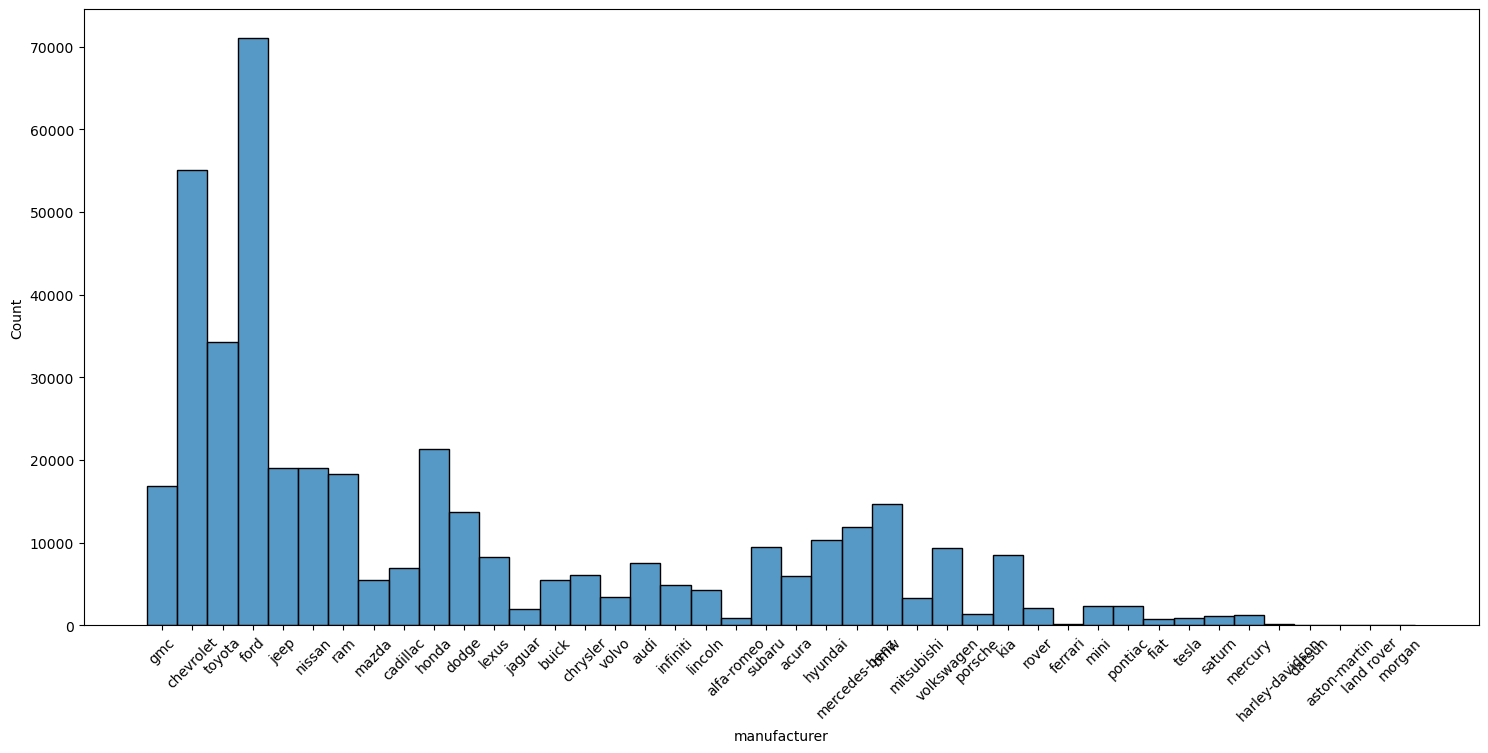

In [388]:
plt.figure(figsize=(18, 8))
sns.histplot(vehicle, x='manufacturer')
plt.xticks(rotation=45)


/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'gmc'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'ford'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'cadillac'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'lexus'),
  Text(12, 0, 'jaguar'),
  Text(13, 0, 'buick'),
  Text(14, 0, 'chrysler'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'lincoln'),
  Text(19, 0, 'alfa-romeo'),
  Text(20, 0, 'subaru'),
  Text(21, 0, 'acura'),
  Text(22, 0, 'hyundai'),
  Text(23, 0, 'mercedes-benz'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'volkswagen'),
  Text(27, 0, 'porsche'),
  Text(28, 0, 'kia'),
  Text(29, 0, 'rover'),
  Text(30, 0, 'mini'),
  Text(31, 0, 'pontiac'),
  Text(32, 0

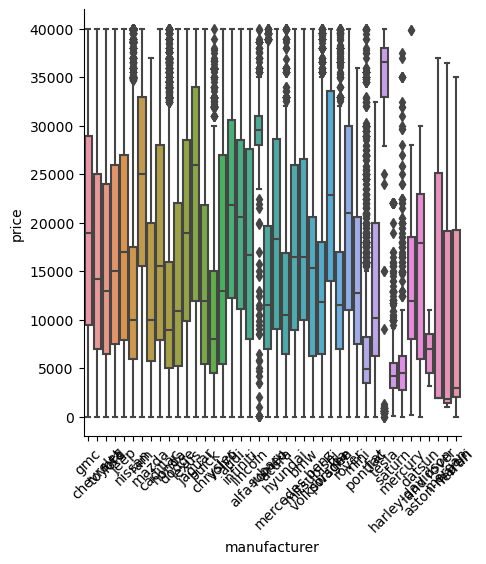

In [389]:
sns.catplot(data=vehicle[(vehicle['price'] > 0) & (vehicle['price'] < 40000)], x="manufacturer", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



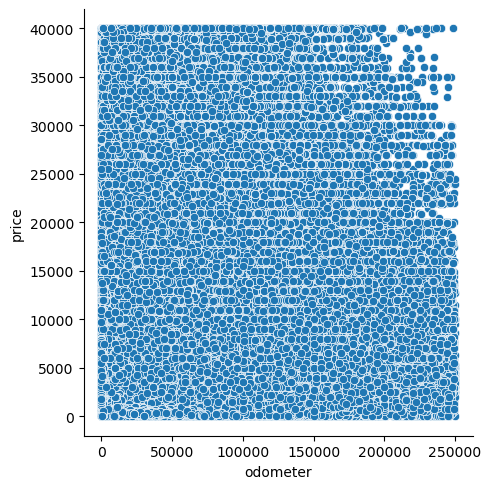

In [390]:

sns.relplot(data=vehicle[(vehicle['price'] > 0) & (vehicle['price'] < 40000) & (vehicle['odometer'] > 0) & (vehicle['odometer'] < 250000)], x="odometer", y="price")

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Clean up data:
- Drop fields not needed for analysis, including high cardinality ones
- Drop records with missing values in year, manufacturer and model
- Impute missing values with most frequent value in these fields: condition, cylinders, fuel, title_status, transmission, drive, size, type and paint_color
- Drop records with zeros in price or odometer
- Drop outliers: price > 60000, odometer > 200000, year < 1995

In [391]:
# Remove fields not necessary for the analysis, based on the initial exploration of the dataset: 
vehicle.drop(columns = ['id','model','VIN','region','state','odometer','manufacturer'], inplace=True)

In [401]:
# Remove rows with missing values
vehicle.dropna(subset=['year','price'], inplace=True)
vehicle.dropna(subset=['condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color'], inplace=True)

In [402]:
vehicle.shape

(84640, 11)

In [403]:
# Drop records with price = 0 or price > 80000 or year < 1995
vehicle_subset = vehicle.loc[(vehicle['price'] > 0) & (vehicle['price'] <= 80000) & (vehicle['year'] >= 1995)]
clean = vehicle_subset

In [404]:
clean.shape

(75184, 11)

In [405]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75184 entries, 31 to 426833
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         75184 non-null  Int64 
 1   year          75184 non-null  Int64 
 2   condition     75184 non-null  string
 3   cylinders     75184 non-null  string
 4   fuel          75184 non-null  string
 5   title_status  75184 non-null  string
 6   transmission  75184 non-null  string
 7   drive         75184 non-null  string
 8   size          75184 non-null  string
 9   type          75184 non-null  string
 10  paint_color   75184 non-null  string
dtypes: Int64(2), string(9)
memory usage: 7.0 MB


In [408]:
clean.shape

(75184, 11)

In [409]:
# Impute missing values with the most common value for the field
#clean.condition = vehicle_subset.condition.fillna('good')
#clean.cylinders = vehicle_subset.cylinders.fillna('6 cylinders')
#clean.fuel = vehicle_subset.fuel.fillna('gas')
#clean.title_status = vehicle_subset.title_status.fillna('clean')
#clean.transmission = vehicle_subset.transmission.fillna('automatic')
#clean.drive = vehicle_subset.drive.fillna('4wd')
#clean['size'] = vehicle_subset['size'].fillna('full-size')

In [410]:
#clean.type = vehicle_subset.type.fillna('sedan')
#clean.paint_color = vehicle_subset.paint_color.fillna('white')

In [412]:
clean.head()

,price,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
31,15000,2013,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black
55,19900,2004,good,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,blue
59,14000,2012,excellent,6 cylinders,gas,clean,automatic,fwd,full-size,mini-van,silver
65,22500,2001,good,8 cylinders,diesel,clean,manual,rwd,full-size,truck,white
73,15000,2017,excellent,8 cylinders,gas,rebuilt,automatic,rwd,mid-size,sedan,grey


In [413]:
clean = clean.reset_index()
clean.head()

,index,price,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
0,31,15000,2013,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black
1,55,19900,2004,good,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,blue
2,59,14000,2012,excellent,6 cylinders,gas,clean,automatic,fwd,full-size,mini-van,silver
3,65,22500,2001,good,8 cylinders,diesel,clean,manual,rwd,full-size,truck,white
4,73,15000,2017,excellent,8 cylinders,gas,rebuilt,automatic,rwd,mid-size,sedan,grey


In [414]:
clean.drop(columns=['index'], inplace=True)

In [415]:
# Check for duplicates and drop if any
clean.duplicated(keep=False).sum()

28619

In [416]:
clean.drop_duplicates(inplace=True, ignore_index=True)
clean.shape

(55433, 11)

In [417]:
clean.head()

,price,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
0,15000,2013,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black
1,19900,2004,good,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,blue
2,14000,2012,excellent,6 cylinders,gas,clean,automatic,fwd,full-size,mini-van,silver
3,22500,2001,good,8 cylinders,diesel,clean,manual,rwd,full-size,truck,white
4,15000,2017,excellent,8 cylinders,gas,rebuilt,automatic,rwd,mid-size,sedan,grey


#### Visualize data after cleanup

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021'),
  Text(27, 0, '2022')])

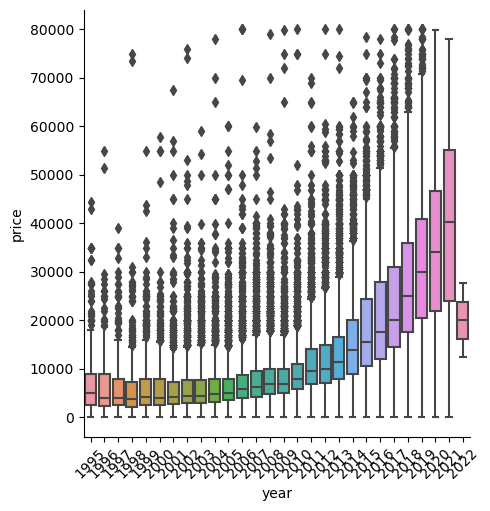

In [418]:
sns.catplot(data=clean, x="year", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'excellent'),
  Text(1, 0, 'good'),
  Text(2, 0, 'new'),
  Text(3, 0, 'fair'),
  Text(4, 0, 'like new'),
  Text(5, 0, 'salvage')])

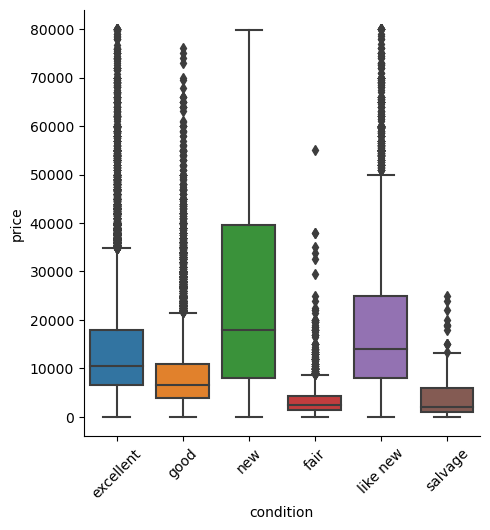

In [419]:
sns.catplot(data=clean, x="condition", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6 cylinders'),
  Text(1, 0, '8 cylinders'),
  Text(2, 0, '4 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, '10 cylinders'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, 'other'),
  Text(7, 0, '12 cylinders')])

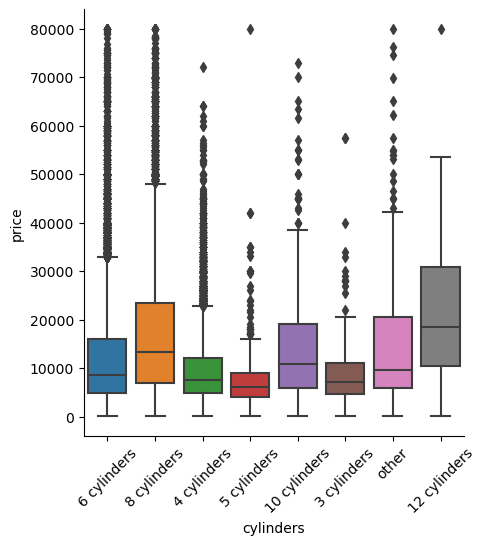

In [420]:
sns.catplot(data=clean, x="cylinders", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'clean'),
  Text(1, 0, 'rebuilt'),
  Text(2, 0, 'salvage'),
  Text(3, 0, 'lien'),
  Text(4, 0, 'missing'),
  Text(5, 0, 'parts only')])

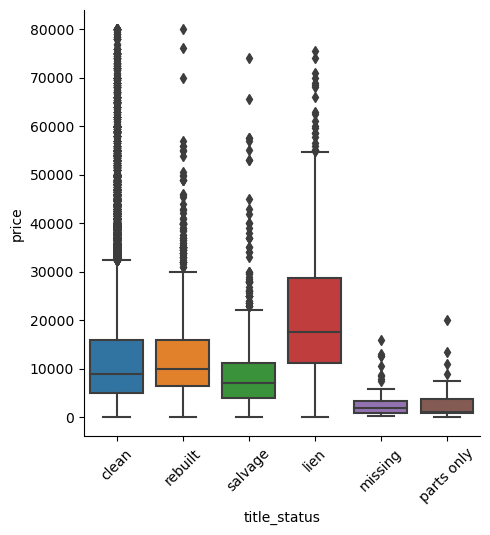

In [421]:
sns.catplot(data=clean, x="title_status", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2]),
 [Text(0, 0, 'automatic'), Text(1, 0, 'manual'), Text(2, 0, 'other')])

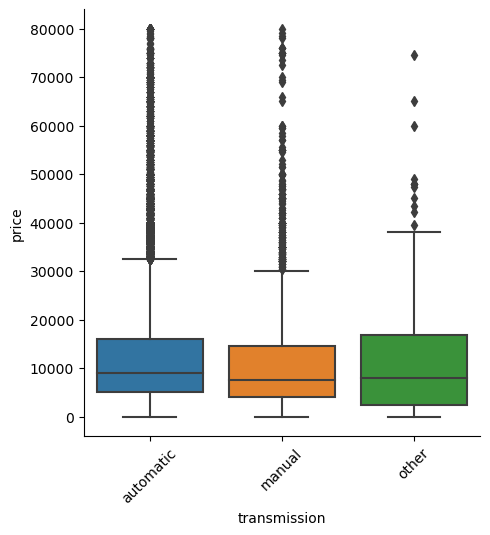

In [422]:
sns.catplot(data=clean, x="transmission", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2]), [Text(0, 0, 'rwd'), Text(1, 0, '4wd'), Text(2, 0, 'fwd')])

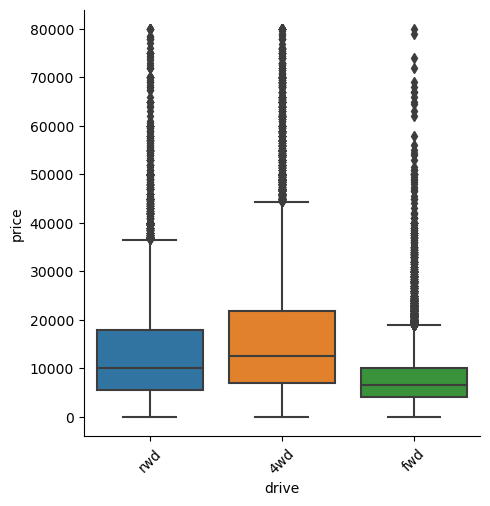

In [423]:
sns.catplot(data=clean, x="drive", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([0, 1, 2, 3]),
 [Text(0, 0, 'full-size'),
  Text(1, 0, 'mid-size'),
  Text(2, 0, 'compact'),
  Text(3, 0, 'sub-compact')])

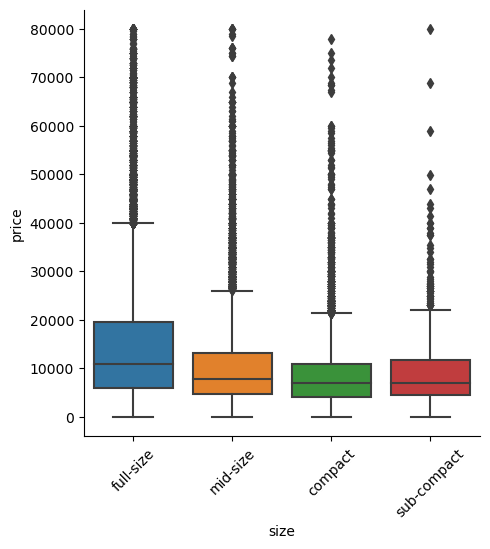

In [424]:
sns.catplot(data=clean, x="size", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'truck'),
  Text(1, 0, 'pickup'),
  Text(2, 0, 'mini-van'),
  Text(3, 0, 'sedan'),
  Text(4, 0, 'offroad'),
  Text(5, 0, 'bus'),
  Text(6, 0, 'SUV'),
  Text(7, 0, 'convertible'),
  Text(8, 0, 'hatchback'),
  Text(9, 0, 'wagon'),
  Text(10, 0, 'other'),
  Text(11, 0, 'van'),
  Text(12, 0, 'coupe')])

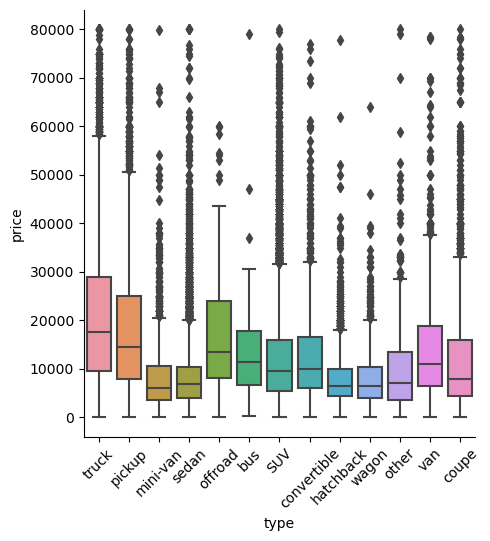

In [425]:
sns.catplot(data=clean, x="type", y="price", kind="box")
plt.xticks(rotation=45)

/Users/sundar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'silver'),
  Text(3, 0, 'white'),
  Text(4, 0, 'grey'),
  Text(5, 0, 'yellow'),
  Text(6, 0, 'red'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'green'),
  Text(9, 0, 'purple'),
  Text(10, 0, 'custom'),
  Text(11, 0, 'orange')])

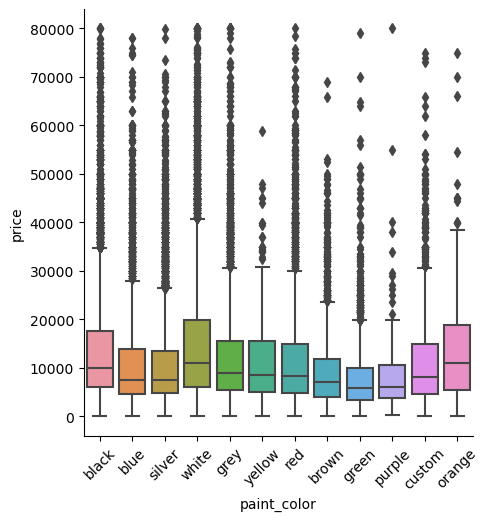

In [426]:
sns.catplot(data=clean, x="paint_color", y="price", kind="box")
plt.xticks(rotation=45)

In [427]:
# Shuffle the data before splitting into training and test sets
clean = clean.sample(frac=1).reset_index(drop=True)
clean.head()

,price,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
0,18500,2013,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,grey
1,9700,2011,excellent,6 cylinders,gas,clean,automatic,4wd,mid-size,sedan,black
2,17999,2011,like new,8 cylinders,gas,clean,automatic,4wd,full-size,sedan,black
3,4000,2005,good,8 cylinders,gas,clean,automatic,4wd,full-size,SUV,black
4,3000,2004,excellent,6 cylinders,gas,clean,automatic,fwd,mid-size,convertible,silver


In [428]:
# Add a quadratic feature based on year
clean['year2'] = clean['year'] * clean['year']

In [429]:
clean.head()

,price,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,year2
0,18500,2013,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,SUV,grey,4052169
1,9700,2011,excellent,6 cylinders,gas,clean,automatic,4wd,mid-size,sedan,black,4044121
2,17999,2011,like new,8 cylinders,gas,clean,automatic,4wd,full-size,sedan,black,4044121
3,4000,2005,good,8 cylinders,gas,clean,automatic,4wd,full-size,SUV,black,4020025
4,3000,2004,excellent,6 cylinders,gas,clean,automatic,fwd,mid-size,convertible,silver,4016016


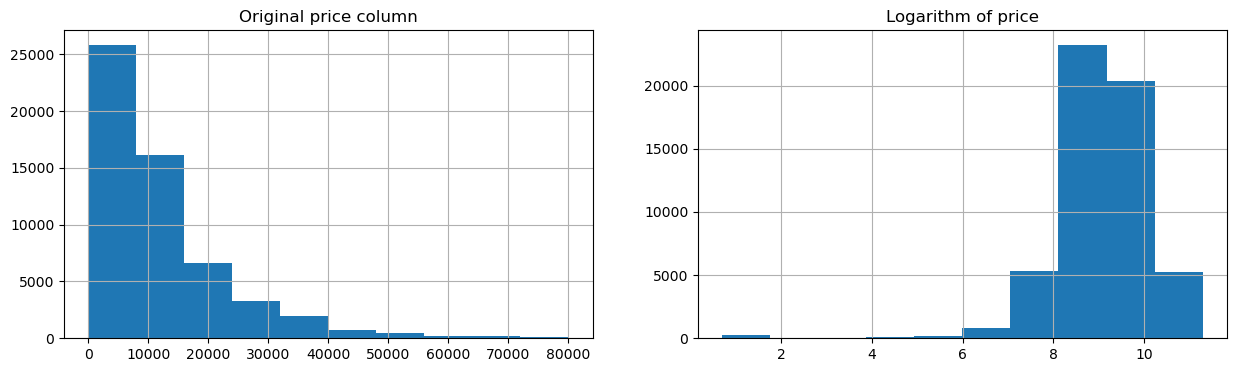

In [430]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(clean['price'])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(clean['price']))
ax[1].grid()
ax[1].set_title('Logarithm of price');

In [431]:
# Split into test and training data, converting the price values to log
X_train, X_test, y_train, y_test = train_test_split(clean.drop('price', axis = 1), np.log1p(clean.price), 
                                                   random_state=42, test_size = 0.3)

In [432]:
X_train.head()

,year,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,year2
37837,2009,good,6 cylinders,gas,clean,automatic,4wd,full-size,mini-van,grey,4036081
37767,2013,excellent,4 cylinders,gas,clean,automatic,fwd,full-size,sedan,silver,4052169
28465,2014,excellent,4 cylinders,gas,clean,automatic,fwd,compact,hatchback,red,4056196
43946,2010,excellent,8 cylinders,gas,clean,automatic,4wd,full-size,sedan,black,4040100
34713,2009,fair,4 cylinders,gas,clean,automatic,fwd,mid-size,sedan,red,4036081


In [433]:
# Create a column_transformer object to encode categorical features into numerical features using OneHotEncoding
categorical_features = ['condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_features), 
                                          remainder='passthrough', verbose_feature_names_out=False)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [434]:
# Build a pipeline to do the following
# Apply the column transformation to encode categorical features into numerical features
# Scale and normalize the input data
# Fit a linear regression
pipe_1 = Pipeline([
    ('col_transformer', col_transformer),
    ('scaler', StandardScaler(with_mean=False)),
    ('linreg', LinearRegression())
])

In [435]:
pipe_1.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('linreg', LinearRegression())])

In [436]:
pred_train_1 = pipe_1.predict(X_train)
pred_test_1 = pipe_1.predict(X_test)
pipe_1_train_mse = mean_squared_error(y_train, pred_train_1)
pipe_1_test_mse = mean_squared_error(y_test, pred_test_1)
#print(pipe_1.named_steps)
print(f'Linear Reg Train MSE: {pipe_1_train_mse: .5f}')
print(f'Linear Reg Test MSE: {pipe_1_test_mse: .5f}')

Linear Reg Train MSE:  0.64372
Linear Reg Test MSE:  0.66312


In [437]:
feature_names_1 = pipe_1.named_steps['col_transformer'].get_feature_names_out()
coefs_1 = pipe_1.named_steps['linreg'].coef_
lin_reg_df = pd.DataFrame({'feature': feature_names_1, 'coef': coefs_1})

In [438]:
#print(lin_reg_df.to_string())
print(lin_reg_df.reindex(lin_reg_df.coef.abs().sort_values(ascending=False).index).to_string())

                    feature       coef
61                    year2  55.519653
60                     year -55.046534
1            condition_fair  -0.152885
27       transmission_other  -0.101736
44               type_sedan  -0.081901
12    cylinders_8 cylinders   0.081603
45               type_truck   0.078133
29                drive_fwd  -0.077355
37         type_convertible   0.075167
0       condition_excellent   0.073580
14              fuel_diesel   0.071400
9     cylinders_4 cylinders  -0.067300
28                drive_4wd   0.058281
16                 fuel_gas  -0.058100
5         condition_salvage  -0.055043
3        condition_like new   0.054868
43              type_pickup   0.042172
2            condition_good  -0.039523
47               type_wagon  -0.035568
6    cylinders_10 cylinders  -0.033160
26      transmission_manual   0.030944
31             size_compact  -0.030311
38               type_coupe   0.027043
39           type_hatchback  -0.025558
41             type_offro

In [439]:
# 2. Trying Sequential Feature Selector
#
# Build a pipeline to:
# Apply the column transformation to encode categorical features into numerical features
# Scale and normalize the input data
# Call SequentialFeatureSelector
# Run Linear Regression model on the selected features
pipe_2 = Pipeline([
    ('col_transformer', col_transformer),
    ('scaler', StandardScaler(with_mean=False)),
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])

In [440]:
# Try a number of features
num_features_list_2 = list(range(5, 11))
param_dict_2 = {'selector__n_features_to_select': num_features_list_2}
selector_grid_2 = GridSearchCV(pipe_2, param_grid=param_dict_2)
selector_grid_2.fit(X_train, y_train)
train_preds_2 = selector_grid_2.predict(X_train)
test_preds_2 = selector_grid_2.predict(X_test)
selector_train_mse_2 = mean_squared_error(y_train, train_preds_2)
selector_test_mse_2 = mean_squared_error(y_test, test_preds_2)

In [441]:
print(f'SFS Train MSE: {selector_train_mse_2: .5f}')
print(f'SFS Test MSE: {selector_test_mse_2: .5f}')

SFS Train MSE:  0.66892
SFS Test MSE:  0.68530


In [442]:
best_estimator = selector_grid_2.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid_2.best_estimator_.named_steps['model']
best_selector.get_support()
features_2 = pd.DataFrame({'feature': feature_names_1, 'selected': best_selector.get_support()}, columns=['feature', 'selected'])
features_2 = features_2[features_2['selected']]
features_coefs_2 = pd.DataFrame(
    {'feature': features_2['feature'],
     'coef': best_model.coef_}, 
    columns=['feature', 'coef']
)

print(features_coefs_2.to_string())

                  feature       coef
1          condition_fair  -0.189057
2          condition_good  -0.111704
5       condition_salvage  -0.074102
12  cylinders_8 cylinders   0.143792
14            fuel_diesel   0.151651
27     transmission_other  -0.104291
29              drive_fwd  -0.170710
44             type_sedan  -0.095838
60                   year -56.292721
61                  year2  56.750797


In [443]:
# 3. Trying GridSearchCV
#
# Build a pipeline to:
# Apply the column transformation to encode categorical features into numerical features
# Scale and normalize the input data
# Call GridSearchCV for a range of alpha values
ridge_param_dict = {'model__regressor__alpha': np.logspace(0, 10, 50)}
pipe_3 = Pipeline([
    ('col_transformer', col_transformer),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', TransformedTargetRegressor(
        regressor=Ridge(), func=np.log10, inverse_func=sp.special.exp10
    ))
])
ridge_grid = GridSearchCV(pipe_3, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
pipe_3

Train MSE: 0.6814315367723699
Test MSE: 0.6946344700669469


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge()))])

In [444]:
best_estimator_3 = ridge_grid.best_estimator_
best_estimator_3.named_steps
best_model_3 = ridge_grid.best_estimator_.named_steps['model']
#feature_names = X_train.columns[best_selector.get_support()]
best_model_3

TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>,
                           regressor=Ridge(alpha=4714.866363457394))

In [445]:
best_model_3.score

<bound method RegressorMixin.score of TransformedTargetRegressor(func=<ufunc 'log10'>, inverse_func=<ufunc 'exp10'>,
                           regressor=Ridge(alpha=4714.866363457394))>

In [446]:
ridge_regressor = best_estimator_3.named_steps['model']
ridge_regressor.regressor_.coef_

array([ 3.19983755e-03, -7.34102056e-03, -1.70400322e-03,  3.12116021e-03,
       -1.88560424e-03, -3.05811884e-03, -6.14505672e-03,  7.68227945e-04,
       -5.96970645e-04, -1.55303352e-03, -2.25450976e-04, -7.95678556e-05,
        2.93258526e-03,  1.92304843e-04,  2.98830923e-03,  9.93624771e-04,
       -2.50618413e-03, -4.01001468e-04, -9.43361997e-04,  3.74403102e-05,
        1.02818944e-03, -1.14340081e-03, -1.08781327e-03,  1.01948362e-04,
       -5.12335879e-04,  1.14057306e-03,  1.97189935e-03, -1.09061987e-02,
        2.31244739e-03, -3.35727387e-03,  1.27514576e-03, -2.92997191e-03,
        1.91205598e-03,  1.95044090e-04, -2.45390176e-04, -5.69493991e-04,
        6.45277740e-04,  3.57608710e-03,  1.20990674e-03, -9.94961579e-04,
       -9.82571222e-04,  1.22243180e-03, -2.73324155e-04,  2.48198954e-03,
       -4.71565028e-03,  4.03964886e-03,  9.04858485e-04, -2.43519008e-03,
        6.64320799e-04, -4.46017265e-04, -3.04804150e-04,  4.17770928e-04,
       -2.06100382e-04,  

In [447]:
feature_names_3 = pipe_1.named_steps['col_transformer'].get_feature_names_out()
coefs_3 = ridge_regressor.regressor_.coef_
ridge_reg_df = pd.DataFrame({'feature': feature_names_1, 'coef': coefs_3})
print(ridge_reg_df.reindex(ridge_reg_df.coef.abs().sort_values(ascending=False).index).to_string())

                    feature      coef
27       transmission_other -0.010906
61                    year2  0.009773
60                     year  0.009757
1            condition_fair -0.007341
6    cylinders_10 cylinders -0.006145
44               type_sedan -0.004716
45               type_truck  0.004040
37         type_convertible  0.003576
29                drive_fwd -0.003357
0       condition_excellent  0.003200
3        condition_like new  0.003121
5         condition_salvage -0.003058
14              fuel_diesel  0.002988
12    cylinders_8 cylinders  0.002933
31             size_compact -0.002930
16                 fuel_gas -0.002506
43              type_pickup  0.002482
47               type_wagon -0.002435
28                drive_4wd  0.002312
26      transmission_manual  0.001972
32           size_full-size  0.001912
4             condition_new -0.001886
2            condition_good -0.001704
9     cylinders_4 cylinders -0.001553
30                drive_rwd  0.001275
41          

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The Sequential Feature Selector regression model suggests that when selecting the first ten best features that drive the price of the used car, the year of manufacture has the highest weight. This is follwed by features such as the condition of the vehicle, the type of fuel, drive type and vehicle type.

Running a grid search using Ridge regressor resulted in similar top features. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Used car prices increase exponentially as the age of the vehicle decreases, so newer vehicles are priced higher. Odometer readings do not have an impact in used car pricing. 

The features that heavily impact used car prices are:
- Year of manufacture - the more recent the used car was built, the higher the price.
- Condition of the car - vehicles in excellent and like-new conditions are priced higher. Vehicles listed as fair condition are priced lower.
- The type of the vehicle - pickups, trucks, and convertible vehicles are priced higher, and sedans, mini-vans and hatchbacks have a negative effect on prices.
- Type of fuel - Diesel vehicles get a higher used car price than gasoline vehicles, and even used electric vehicles are higher prices than gas-powered ones.
- Size of the vehicle - full-size and mid-size vehicles command higher prices than compact ones.
- Color - paint color does not have much impact on the price, although certain colors such as grey, black and white fetch higher prices.
- Cars with missing title do not have as much value as cars with clean titles.
- Rear-wheel drive and 4-wheel drive vehicles get higher prices than fore-wheel drive vehicles.
- Manual transmission has a higher impact on prices than automatic transmission ones.

